In [22]:
#Librerias

import numpy as np
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
import folium

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from IPython.display import Image
import imageio
import os

import random

# Implementación del algoritmo evolutivo


In [23]:
# Coordenadas de las capitales de los estados de México en latitud, longitud

# Fuente: INEGI - Marco Geoestadístico Nacional 2020
# https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469

coordenadas_estados = {
    'Aguascalientes': [21.8818, -102.2916],      # Aguascalientes
    'Mexicali': [32.6278, -115.4545],            # Baja California
    'La Paz': [24.1427, -110.3127],              # Baja California Sur
    'Campeche': [19.8301, -90.5349],             # Campeche
    'Tuxtla Gutiérrez': [16.7370, -93.1029],     # Chiapas
    'Chihuahua': [28.6353, -106.0889],           # Chihuahua
    'Ciudad de México': [19.4326, -99.1332],      # Ciudad de México
    'Saltillo': [25.4267, -101.0029],            # Coahuila
    'Colima': [19.2433, -103.7247],              # Colima
    'Victoria de Durango': [24.0277, -104.6532],  # Durango
    'Toluca': [19.2926, -99.6556],               # Estado de México
    'Guanajuato': [21.0190, -101.2574],          # Guanajuato
    'Chilpancingo': [17.5449, -99.5017],         # Guerrero
    'Pachuca': [20.1168, -98.7452],              # Hidalgo
    'Guadalajara': [20.6597, -103.3496],         # Jalisco
    'Morelia': [19.7060, -101.1950],             # Michoacán
    'Cuernavaca': [18.9217, -99.2345],           # Morelos
    'Tepic': [21.5041, -104.8946],               # Nayarit
    'Monterrey': [25.6866, -100.3161],           # Nuevo León
    'Oaxaca': [17.0732, -96.7266],               # Oaxaca
    'Puebla': [19.0413, -98.2062],               # Puebla
    'Santiago de Querétaro': [20.5888, -100.3899], # Querétaro
    'Chetumal': [18.5052, -88.3054],             # Quintana Roo
    'San Luis Potosí': [22.1565, -100.9855],     # San Luis Potosí
    'Culiacán': [24.8091, -107.3940],            # Sinaloa
    'Hermosillo': [29.0729, -110.9559],          # Sonora
    'Villahermosa': [17.9892, -92.9281],         # Tabasco
    'Ciudad Victoria': [23.7369, -99.1411],       # Tamaulipas
    'Tlaxcala': [19.3182, -98.2375],             # Tlaxcala
    'Xalapa': [19.5438, -96.9102],               # Veracruz
    'Mérida': [20.9674, -89.5926],               # Yucatán
    'Zacatecas': [22.7709, -102.5832]            # Zacatecas
}

In [24]:
def haversine(coord1, coord2): # Función que calcula la distancia en kilómetros entre dos puntos geográficos usando la fórmula de Haversine, 
                               # teniendo en cuenta la curvatura de la Tierra

    R = 6371  # Radio medio de la Tierra en kilómetros

    lat1, lon1 = coord1
    lat2, lon2 = coord2

    # Convertir las coordenadas de grados a radianes
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [25]:
def calcular_distancias(estados): # Función que calcula las distancias entre todos los pares de estados y devuelve una matriz simétrica con las distancias
    num_estados = len(estados)
    distancias = np.zeros((num_estados, num_estados))
    nombres_estados = list(estados.keys())
    for i in range(num_estados):
        for j in range(i + 1, num_estados):
            distancia = haversine(estados[nombres_estados[i]], estados[nombres_estados[j]])
            distancias[i, j] = distancia
            distancias[j, i] = distancia  
    return distancias

dist = calcular_distancias(coordenadas_estados)

df = pd.DataFrame(dist, index=list(coordenadas_estados.keys()), columns=list(coordenadas_estados.keys()))
df

,Aguascalientes,Mexicali,La Paz,Campeche,Tuxtla Gutiérrez,Chihuahua,Ciudad de México,Saltillo,Colima,Victoria de Durango,...,Chetumal,San Luis Potosí,Culiacán,Hermosillo,Villahermosa,Ciudad Victoria,Tlaxcala,Xalapa,Mérida,Zacatecas
Aguascalientes,0.000000,1763.598269,858.384102,1242.389652,1120.712034,842.298670,426.768967,415.443881,329.137644,339.696160,...,1506.409057,138.059115,614.150166,1180.630511,1069.861014,383.161699,509.182753,617.064208,1318.036144,103.312976
Mexicali,1763.598269,0.000000,1068.782756,2852.966808,2856.048740,999.467170,2188.245319,1614.920622,1891.857505,1423.910289,...,3129.228386,1839.487997,1171.173806,583.547097,2778.124021,1876.292045,2263.893397,2348.391607,2864.698297,1672.837670
La Paz,858.384102,1068.782756,0.000000,2092.778550,1970.837568,652.985603,1266.895506,950.420239,871.562549,574.623140,...,2361.082758,978.638050,304.524459,551.926091,1927.279643,1135.955190,1356.964807,1473.862522,2154.727919,802.951621
Campeche,1242.389652,2852.966808,2092.778550,0.000000,437.927813,1853.506418,901.499719,1240.846989,1383.389153,1528.315551,...,276.646373,1115.039851,1818.777304,2303.497400,324.455276,988.800156,808.925469,668.182568,160.115646,1289.827066
Tuxtla Gutiérrez,1120.712034,2856.048740,1970.837568,437.927813,0.000000,1874.683637,704.274351,1266.275585,1157.135694,1450.267792,...,545.082817,1022.466164,1733.938845,2280.657813,140.468607,1000.978345,614.042189,509.129282,598.025899,1197.060839
Chihuahua,842.298670,999.467170,652.985603,1853.506418,1874.683637,0.000000,1242.695569,617.180736,1071.529430,531.926834,...,2129.807805,883.902246,444.748976,476.454066,1788.347859,881.291441,1306.618407,1373.638486,1867.997861,740.544802
Ciudad de México,426.768967,2188.245319,1266.895506,901.499719,704.274351,1242.695569,0.000000,693.627698,482.192330,765.430071,...,1143.078203,358.892142,1039.493497,1606.049002,672.875694,478.617019,94.813707,233.351221,1009.959843,515.581502
Saltillo,415.443881,1614.920622,950.420239,1240.846989,1266.275585,617.180736,693.627698,0.000000,742.290258,400.129949,...,1517.491735,363.633957,647.044739,1063.643075,1173.984075,265.974470,736.272892,777.480979,1266.536013,336.052523
Colima,329.137644,1891.857505,871.562549,1383.389153,1157.135694,1071.529430,482.192330,742.290258,0.000000,540.580748,...,1623.902661,431.377521,725.193107,1315.544551,1146.026324,688.756228,575.962887,715.476861,1487.541872,409.750055
Victoria de Durango,339.696160,1423.910289,574.623140,1528.315551,1450.267792,531.926834,765.430071,400.129949,540.580748,0.000000,...,1800.258905,428.957988,290.779218,840.968121,1389.081543,561.334687,844.584586,941.889132,1583.279650,253.279354


Es importante notar que las distancias calculadas representan líneas rectas entre los puntos, lo cual es una simplificación que introduce un error significativo en comparación con la realidad. En la práctica, las rutas terrestres:
1. Siguen caminos irregulares debido a la topografía del terreno (montañas, valles, etc.)
2. Deben adaptarse a la infraestructura vial existente (carreteras, autopistas)
3. Pueden tener desvíos por zonas urbanas o restricciones de tráfico
4. La presencia de cuerpos de agua u otros obstáculos naturales obligan a tomar rutas más largas
Por lo tanto, las distancias y costos reales de transporte serán significativamente mayores que los calculados en línea recta.


In [26]:
# Crear matriz de peajes basada en las distancias
peajes_entre_estados = np.zeros((len(coordenadas_estados), len(coordenadas_estados)))
nombres_estados = list(coordenadas_estados.keys())

# Calcular peajes basados en distancia
for i in range(len(nombres_estados)):
    for j in range(len(nombres_estados)):
        if i != j:
            distancia = df.iloc[i,j]
            # Si la distancia es menor a 300km, asumimos 1 peaje
            if distancia < 300:
                peajes_entre_estados[i,j] = 1
            # Si la distancia está entre 300 y 600km, asumimos 2 peajes
            elif distancia < 600:
                peajes_entre_estados[i,j] = 2
            # Si la distancia está entre 600 y 900km, asumimos 3 peajes
            elif distancia < 900:
                peajes_entre_estados[i,j] = 3
            # Si la distancia está entre 900 y 1200km, asumimos 4 peajes
            elif distancia < 1200:
                peajes_entre_estados[i,j] = 4
            # Si la distancia está entre 1200 y 1500km, asumimos 5 peajes
            elif distancia < 1500:
                peajes_entre_estados[i,j] = 5
            # Si la distancia está entre 1500 y 1800km, asumimos 6 peajes
            elif distancia < 1800:
                peajes_entre_estados[i,j] = 6
            # Si la distancia está entre 1800 y 2100km, asumimos 7 peajes
            elif distancia < 2100:
                peajes_entre_estados[i,j] = 7
            # Si la distancia es mayor a 2100km, asumimos 8 peajes
            else:
                peajes_entre_estados[i,j] = 8

# Convertir a DataFrame con los mismos índices y columnas que df
df_peajes = pd.DataFrame(peajes_entre_estados, 
                        index=nombres_estados,
                        columns=nombres_estados)

df_peajes

,Aguascalientes,Mexicali,La Paz,Campeche,Tuxtla Gutiérrez,Chihuahua,Ciudad de México,Saltillo,Colima,Victoria de Durango,...,Chetumal,San Luis Potosí,Culiacán,Hermosillo,Villahermosa,Ciudad Victoria,Tlaxcala,Xalapa,Mérida,Zacatecas
Aguascalientes,0.0,6.0,3.0,5.0,4.0,3.0,2.0,2.0,2.0,2.0,...,6.0,1.0,3.0,4.0,4.0,2.0,2.0,3.0,5.0,1.0
Mexicali,6.0,0.0,4.0,8.0,8.0,4.0,8.0,6.0,7.0,5.0,...,8.0,7.0,4.0,2.0,8.0,7.0,8.0,8.0,8.0,6.0
La Paz,3.0,4.0,0.0,7.0,7.0,3.0,5.0,4.0,3.0,2.0,...,8.0,4.0,2.0,2.0,7.0,4.0,5.0,5.0,8.0,3.0
Campeche,5.0,8.0,7.0,0.0,2.0,7.0,4.0,5.0,5.0,6.0,...,1.0,4.0,7.0,8.0,2.0,4.0,3.0,3.0,1.0,5.0
Tuxtla Gutiérrez,4.0,8.0,7.0,2.0,0.0,7.0,3.0,5.0,4.0,5.0,...,2.0,4.0,6.0,8.0,1.0,4.0,3.0,2.0,2.0,4.0
Chihuahua,3.0,4.0,3.0,7.0,7.0,0.0,5.0,3.0,4.0,2.0,...,8.0,3.0,2.0,2.0,6.0,3.0,5.0,5.0,7.0,3.0
Ciudad de México,2.0,8.0,5.0,4.0,3.0,5.0,0.0,3.0,2.0,3.0,...,4.0,2.0,4.0,6.0,3.0,2.0,1.0,1.0,4.0,2.0
Saltillo,2.0,6.0,4.0,5.0,5.0,3.0,3.0,0.0,3.0,2.0,...,6.0,2.0,3.0,4.0,4.0,1.0,3.0,3.0,5.0,2.0
Colima,2.0,7.0,3.0,5.0,4.0,4.0,2.0,3.0,0.0,2.0,...,6.0,2.0,3.0,5.0,4.0,3.0,2.0,3.0,5.0,2.0
Victoria de Durango,2.0,5.0,2.0,6.0,5.0,2.0,3.0,2.0,2.0,0.0,...,7.0,2.0,1.0,3.0,5.0,2.0,3.0,4.0,6.0,1.0


In [27]:
# Variables de costos

estados = len(coordenadas_estados)
hora_vendedor = 12 # Dolares, valor minimo de la hora de trabajo en mexico
valor_peaje = 3 # Dolares, valor promedio de los peajes en mexico
gasolina = 13 # precio por cada kilometro, ya que se escogió la toyota hilux que gasta un promdio de 13 km/l y el litro está a 1 dolar
velocidad_promedio = 70 # km/h


In [28]:
def calcular_matriz_costos(matriz_distancias, hora_vendedor, precio_gasolina, matriz_peajes, velocidad):
    
    num_estados = len(matriz_distancias)
    matriz_costos = np.zeros_like(matriz_distancias)
    
    for i in range(num_estados):
        for j in range(num_estados):
            if i != j:
                distancia = matriz_distancias[i][j]  # Cambiado de [i,j] a [i][j]
                tiempo = distancia / velocidad  # Tiempo en horas
                num_peajes = matriz_peajes.iloc[i,j]  # Usando iloc para acceder al DataFrame
                costo_peajes = num_peajes * valor_peaje
                
                # Costo total = costo gasolina + peajes + costo tiempo vendedor
                costo = (distancia * precio_gasolina) + costo_peajes + (tiempo * hora_vendedor)
                matriz_costos[i][j] = costo  # Cambiado de [i,j] a [i][j]
                
    return pd.DataFrame(matriz_costos, index=nombres_estados, columns=nombres_estados)

matriz_costos = calcular_matriz_costos(df.values.tolist(), hora_vendedor, gasolina, df_peajes, velocidad_promedio)
matriz_costos


,Aguascalientes,Mexicali,La Paz,Campeche,Tuxtla Gutiérrez,Chihuahua,Ciudad de México,Saltillo,Colima,Victoria de Durango,...,Chetumal,San Luis Potosí,Culiacán,Hermosillo,Villahermosa,Ciudad Victoria,Tlaxcala,Xalapa,Mérida,Zacatecas
Aguascalientes,0.000000,23247.108626,11315.144887,16379.046565,14773.378507,11103.276766,5627.156964,5477.989407,4341.212969,4480.283703,...,19859.559289,1821.435770,8098.235038,15562.590449,14103.597932,5052.786954,6712.664261,8136.617146,17375.418923,1363.779485
Mexicali,23247.108626,0.000000,14089.395723,37601.648522,37642.241982,13176.410435,28846.316915,21288.811618,24939.465991,18769.932663,...,41240.408173,24249.684754,15438.032135,7692.148900,36615.862110,24734.446653,29842.710169,30955.672315,37756.168997,22051.661880
La Paz,11315.144887,14089.395723,0.000000,27585.883193,25979.746246,8609.753227,16701.823668,12530.392286,11488.723862,7574.607639,...,31122.832898,12902.061170,4017.022156,7275.655079,25406.026152,14974.152648,17888.165031,19427.874929,28404.844881,10585.019924
Campeche,16379.046565,37601.648522,27585.883193,0.000000,5774.134913,24434.327395,11886.039155,16358.727480,18236.211413,20148.099109,...,3646.827937,14698.667754,23976.895349,30364.351475,4279.539498,13035.910632,10663.704032,8809.918963,2111.951800,17003.865065
Tuxtla Gutiérrez,14773.378507,37642.241982,25979.746246,5774.134913,0.000000,24713.261620,9285.299313,16693.658419,15253.130144,19117.098629,...,7185.519384,13479.340051,22856.451642,30063.521485,1853.172218,13196.314779,8096.812832,6711.959972,7882.855413,15779.001341
Chihuahua,11103.276766,13176.410435,8609.753227,24434.327395,24713.261620,0.000000,16383.075924,8138.151985,14125.573352,7012.236304,...,28076.611376,11651.255300,5863.979375,6281.580702,23573.096088,11616.867260,17225.031017,18107.781201,24625.200401,9763.032959
Ciudad de México,5627.156964,28846.316915,16701.823668,11886.039155,9285.299313,16383.075924,0.000000,9145.067683,6357.161839,10090.807501,...,15067.972907,4733.122212,13703.614341,21171.959708,8871.734147,6310.069883,1251.831973,3076.568942,13314.613936,6796.944927
Saltillo,5477.989407,21288.811618,12530.392286,16358.727480,16693.658419,8138.151985,9145.067683,0.000000,9786.023114,5276.283047,...,20005.534000,4795.578689,8531.503561,14021.698794,15475.047389,3506.263727,9706.765802,10249.535178,16697.088635,4432.291797
Colima,4341.212969,24939.465991,11488.723862,18236.211413,15253.130144,14125.573352,6357.161839,9786.023114,0.000000,7126.220713,...,21407.117908,5687.858211,9560.829214,17342.601090,15106.803872,9080.903466,7592.254027,9432.852366,19608.051514,5402.993588
Victoria de Durango,4480.283703,18769.932663,7574.607639,20148.099109,19117.098629,7012.236304,10090.807501,5276.283047,7126.220713,0.000000,...,23732.981576,5655.989500,3832.977703,11085.751536,18311.188318,7399.579733,11133.385549,12418.025423,20872.054814,3339.050922


Generación 1: Mejor costo = 243746.36
Generación 2: Mejor costo = 240136.43
Generación 3: Mejor costo = 221787.48
Generación 4: Mejor costo = 221787.48
Generación 5: Mejor costo = 220006.63
Generación 6: Mejor costo = 208525.40
Generación 7: Mejor costo = 208525.40
Generación 8: Mejor costo = 203288.21
Generación 9: Mejor costo = 191143.88
Generación 10: Mejor costo = 184275.98
Generación 11: Mejor costo = 184116.16
Generación 12: Mejor costo = 174314.74
Generación 13: Mejor costo = 163087.93
Generación 14: Mejor costo = 159505.06
Generación 15: Mejor costo = 159505.06
Generación 16: Mejor costo = 156501.30
Generación 17: Mejor costo = 153975.77
Generación 18: Mejor costo = 153975.77
Generación 19: Mejor costo = 152284.77
Generación 20: Mejor costo = 151546.42
Generación 21: Mejor costo = 150101.11
Generación 22: Mejor costo = 145835.31
Generación 23: Mejor costo = 143892.73
Generación 24: Mejor costo = 140191.61
Generación 25: Mejor costo = 135925.81
Generación 26: Mejor costo = 12981

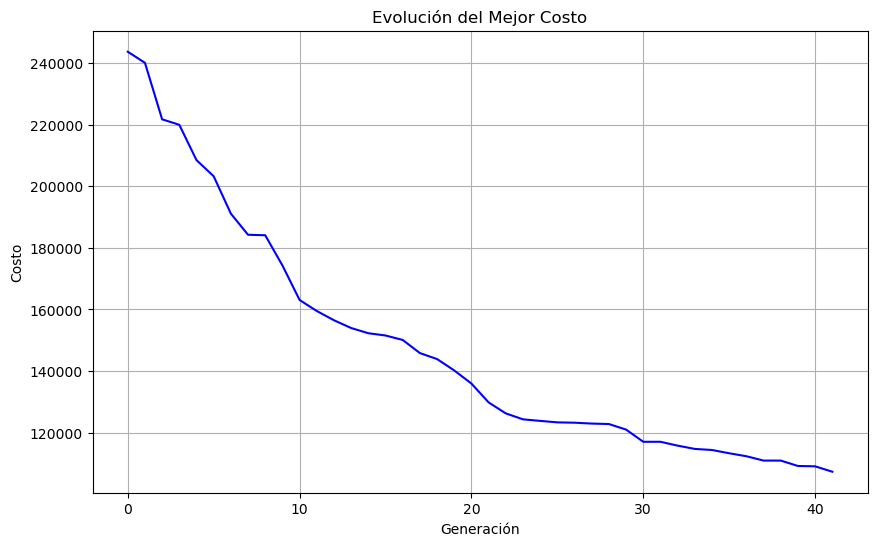

In [29]:
np.random.seed(420)
random.seed(420)

## Algoritmo evolutivo para encontrar la mejor ruta ##

def es_ruta_valida(ruta, nombres_estados = coordenadas_estados): # Función que verifica si una ruta cumple con las restricciones de Baja California
    
    for i in range(len(ruta) - 1):
        estado_actual = nombres_estados[ruta[i]]
        siguiente_estado = nombres_estados[ruta[i + 1]]
        
        # Restricciones para Baja California y Baja California Sur
        if siguiente_estado == 'La Paz' and estado_actual != 'Mexicali':
            return False
        if siguiente_estado == 'Baja California' and estado_actual != 'Hermosillo':
            return False
        if estado_actual == 'La Paz' and siguiente_estado != 'Mexicali':
            return False
        if estado_actual == 'Mexicali' and siguiente_estado not in ['La Paz', 'Hermosillo']:
            return False
    
    return True

def generar_ruta_aleatoria(num_estados): # Función que genera una ruta aleatoria y verifica si es válida
    intentos = 0
    max_intentos = 1000
    
    while intentos < max_intentos:
        ruta = list(range(num_estados))
        random.shuffle(ruta)
        if es_ruta_valida(ruta, nombres_estados):
            return ruta
        intentos += 1
    
    # Si no se encuentra una ruta válida, generar una básica válida
    return list(range(num_estados))

def cruzar_rutas(ruta1, ruta2): # Función que cruza dos rutas para generar un hijo
    max_intentos = 100
    for _ in range(max_intentos):
        size = len(ruta1)
        punto1, punto2 = sorted(random.sample(range(size), 2))
        
        # Mapeo para preservar elementos
        mapping = dict(zip(ruta1[punto1:punto2], ruta2[punto1:punto2]))
        
        hijo = [-1] * size
        hijo[punto1:punto2] = ruta1[punto1:punto2]
        
        # Completar el resto de la ruta
        for i in range(size):
            if i < punto1 or i >= punto2:
                current = ruta2[i]
                while current in mapping:
                    current = mapping[current]
                hijo[i] = current
        
        if es_ruta_valida(hijo, nombres_estados):
            return hijo
    
    return ruta1.copy()

def mutar_ruta(ruta, probabilidad_mutacion): # Función que muta una ruta para evitar la convergencia prematura
    if random.random() < probabilidad_mutacion:
        max_intentos = 100
        ruta_original = ruta.copy()
        
        for _ in range(max_intentos):
            nueva_ruta = ruta.copy()
            i, j = sorted(random.sample(range(len(ruta)), 2))
            nueva_ruta[i:j+1] = reversed(nueva_ruta[i:j+1])
            
            if es_ruta_valida(nueva_ruta, nombres_estados):
                return nueva_ruta
        
        return ruta_original
    return ruta

def algoritmo_genetico_optimizado(distancias, num_poblacion=100, num_generaciones=200, 
                                probabilidad_mutacion=0.1, tolerancia_mejoras=20):
    num_estados = len(distancias)
    poblacion = []
    
    # Generar población inicial válida
    while len(poblacion) < num_poblacion:
        ruta = generar_ruta_aleatoria(num_estados)
        costo_total = 0
        for i in range(len(ruta)-1):
            costo_total += matriz_costos.iloc[ruta[i], ruta[i+1]]
        if costo_total != float('inf'):
            poblacion.append(ruta)
    
    mejor_ruta = None
    mejor_costo = float('inf')
    generaciones_sin_mejora = 0
    historial_mejores = []
    
    porcentaje_elite = 0.1
    num_elite = max(1, int(num_poblacion * porcentaje_elite)) # Número de individuos élites que se preservan en cada generación

    for generacion in range(num_generaciones):
        # Evaluar población
        costos = []
        for ruta in poblacion:
            costo_total = 0
            for i in range(len(ruta)-1):
                costo_total += matriz_costos.iloc[ruta[i], ruta[i+1]]
            costos.append(costo_total)
        
        # Encontrar mejor solución
        indices_validos = [i for i, costo in enumerate(costos) if costo != float('inf')]
        if indices_validos:
            mejor_indice = min(indices_validos, key=lambda i: costos[i])
            if costos[mejor_indice] < mejor_costo:
                mejor_costo = costos[mejor_indice]
                mejor_ruta = poblacion[mejor_indice].copy()
                generaciones_sin_mejora = 0
                historial_mejores.append(mejor_costo)
            else:
                generaciones_sin_mejora += 1

            print(f"Generación {generacion + 1}: Mejor costo = {mejor_costo:.2f}")

            # Criterio de parada
            if generaciones_sin_mejora >= tolerancia_mejoras and generacion > num_generaciones // 2:
                print("Convergencia detectada, finalizando algoritmo.")
                break

            # Selección y evolución
            rutas_validas = [(costo, ruta) for costo, ruta in zip(costos, poblacion) 
                            if costo != float('inf')]
            if rutas_validas:
                elite = sorted(rutas_validas)[:num_elite]
                nueva_poblacion = [ruta for _, ruta in elite]

                while len(nueva_poblacion) < num_poblacion:
                    # Torneo
                    if len(indices_validos) >= 3:
                        indices_torneo = random.sample(indices_validos, 3)
                        padre = min([(costos[i], poblacion[i]) for i in indices_torneo])[1]
                        indices_torneo = random.sample(indices_validos, 3)
                        madre = min([(costos[i], poblacion[i]) for i in indices_torneo])[1]

                        hijo = cruzar_rutas(padre, madre)
                        hijo = mutar_ruta(hijo, probabilidad_mutacion)
                        
                        costo_total = 0
                        for i in range(len(hijo)-1):
                            costo_total += matriz_costos.iloc[hijo[i], hijo[i+1]]
                        if costo_total != float('inf'):
                            nueva_poblacion.append(hijo)

                if len(nueva_poblacion) >= num_poblacion // 2:
                    poblacion = nueva_poblacion
                    while len(poblacion) < num_poblacion:
                        ruta = generar_ruta_aleatoria(num_estados)
                        costo_total = 0
                        for i in range(len(ruta)-1):
                            costo_total += matriz_costos.iloc[ruta[i], ruta[i+1]]
                        if costo_total != float('inf'):
                            poblacion.append(ruta)

            # Ajuste dinámico de mutación
            if generaciones_sin_mejora > tolerancia_mejoras // 2:
                probabilidad_mutacion = min(0.5, probabilidad_mutacion * 1.5)
            else:
                probabilidad_mutacion = max(0.1, probabilidad_mutacion * 0.9)

    return mejor_ruta, mejor_costo, historial_mejores

# Ejecutar algoritmo
mejor_ruta_indices, mejor_costo, historial = algoritmo_genetico_optimizado(df.values)

if mejor_ruta_indices is not None:
    nombres_estados = list(coordenadas_estados.keys())
    mejor_ruta = [nombres_estados[i] for i in mejor_ruta_indices]
    print("Mejor ruta:", mejor_ruta)
    print("Costo total:", mejor_costo)
    
    # Graficar evolución del mejor costo
    plt.figure(figsize=(10, 6))
    plt.plot(historial, 'b-')
    plt.title('Evolución del Mejor Costo')
    plt.xlabel('Generación')
    plt.ylabel('Costo')
    plt.grid(True)
    plt.show()
else:
    print("El algoritmo no encontró una solución válida")


Generación 1: Mejor costo = 253904.86
Generación 2: Mejor costo = 253904.86
Generación 3: Mejor costo = 238595.49
Generación 4: Mejor costo = 238595.49
Generación 5: Mejor costo = 236779.34
Generación 6: Mejor costo = 211719.83
Generación 7: Mejor costo = 211719.83
Generación 8: Mejor costo = 211719.83
Generación 9: Mejor costo = 211044.64
Generación 10: Mejor costo = 192607.13
Generación 11: Mejor costo = 192607.13
Generación 12: Mejor costo = 183271.06
Generación 13: Mejor costo = 180849.23
Generación 14: Mejor costo = 180849.23
Generación 15: Mejor costo = 176470.54
Generación 16: Mejor costo = 170054.74
Generación 17: Mejor costo = 170054.74
Generación 18: Mejor costo = 169469.89
Generación 19: Mejor costo = 164835.82
Generación 20: Mejor costo = 164835.82
Generación 21: Mejor costo = 162043.71
Generación 22: Mejor costo = 160632.77
Generación 23: Mejor costo = 160550.47
Generación 24: Mejor costo = 147435.09
Generación 25: Mejor costo = 147435.09
Generación 26: Mejor costo = 14743

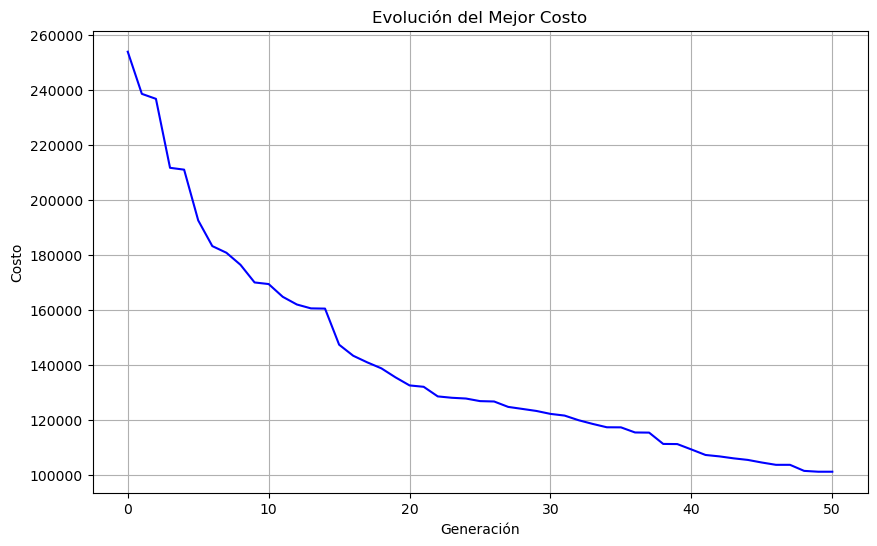

In [30]:
# Parámetros ajustados para la ejecución optimizada
num_poblacion = 200  # Incrementado significativamente para mayor diversidad
num_generaciones = 500  # Más generaciones para mejor exploración
probabilidad_mutacion = 0.2  # Mayor probabilidad para escapar óptimos locales
tolerancia_mejoras = 20  # Aumentada para dar más tiempo a encontrar mejores soluciones
num_elite = 10  # Preservar más individuos élite

# Ejecutar el algoritmo genético optimizado
mejor_ruta_indices, mejor_costo, historial = algoritmo_genetico_optimizado(df.values, num_poblacion, num_generaciones, probabilidad_mutacion, tolerancia_mejoras)

# Convertir índices a nombres de estados usando la lista de nombres_estados
mejor_ruta_evolucion = [nombres_estados[i] for i in mejor_ruta_indices]
print("\nMejor ruta encontrada:", mejor_ruta_evolucion)
print("Costo total:", mejor_costo)

# Graficar evolución del mejor costo
plt.figure(figsize=(10, 6))
plt.plot(historial, 'b-')
plt.title('Evolución del Mejor Costo')
plt.xlabel('Generación')
plt.ylabel('Costo')
plt.grid(True)
plt.show()

In [31]:
# Animación
def crear_animacion(ruta, coordenadas_estados, nombref_gif):
    # Crear una lista de imágenes para el GIF
    imagenes = []

    # Por cada paso en la ruta
    for i in range(len(ruta)):
        # Crear un nuevo mapa centrado en México
        m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
        
        # Dibujar la ruta hasta el punto actual
        coordenadas_ruta = []
        for j in range(i + 1):
            estado = ruta[j]
            folium.CircleMarker(
                location=coordenadas_estados[estado],
                radius=8,
                color='red',
                fill=True
            ).add_to(m)
            coordenadas_ruta.append(coordenadas_estados[estado])
        
        # Dibujar las líneas entre los puntos
        if len(coordenadas_ruta) > 1:
            folium.PolyLine(
                coordenadas_ruta,
                weight=2,
                color='red',
                opacity=0.8
            ).add_to(m)
        
        # Guardar el mapa como imagen - Corregido el nombre del archivo
        nombre_archivo = f'ruta_{i}.html'
        m.save(nombre_archivo)
        
        # Usar selenium para convertir HTML a imagen
        try:
            chrome_options = Options()
            chrome_options.add_argument("--headless")
            chrome_options.add_argument("--no-sandbox")
            chrome_options.add_argument("--disable-dev-shm-usage")
            
            driver = webdriver.Chrome(options=chrome_options)
            driver.get(f'file:///{os.path.abspath(nombre_archivo)}')
            time.sleep(2)  # Esperar a que el mapa se cargue
            
            # Guardar screenshot
            driver.save_screenshot(f'ruta_{i}.png')
            driver.quit()
            
            # Agregar la imagen a la lista
            imagenes.append(imageio.imread(f'ruta_{i}.png'))
            
        except Exception as e:
            print(f"Error al procesar imagen {i}: {str(e)}")

    # Crear el GIF
    imageio.mimsave(f'ruta_estados-{nombref_gif}.gif', imagenes, duration=0.5)

    # Mostrar el GIF
    Image(filename=f'ruta_estados-{nombref_gif}.gif')

    # Limpiar archivos temporales
    for i in range(len(mejor_ruta)):
        try:
            os.remove(f'ruta_{i}.png')
            os.remove(f'ruta_{i}.html')
        except:
            pass

In [32]:
crear_animacion(mejor_ruta_evolucion, coordenadas_estados, "Ev")

C:\Users\User\AppData\Local\Temp\ipykernel_22172\2070981058.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagenes.append(imageio.imread(f'ruta_{i}.png'))


# Optimización con algoritmo de colonia de hormigas

Iteración 1: Mejor costo = 140157.07
Iteración 2: Mejor costo = 134911.12
Iteración 3: Mejor costo = 134760.01
Iteración 4: Mejor costo = 134760.01
Iteración 5: Mejor costo = 134760.01
Iteración 6: Mejor costo = 134760.01
Iteración 7: Mejor costo = 134760.01
Iteración 8: Mejor costo = 133728.54
Iteración 9: Mejor costo = 133728.54
Iteración 10: Mejor costo = 133652.61
Iteración 11: Mejor costo = 132830.02
Iteración 12: Mejor costo = 132830.02
Iteración 13: Mejor costo = 132830.02
Iteración 14: Mejor costo = 132830.02
Iteración 15: Mejor costo = 126683.15
Iteración 16: Mejor costo = 126683.15
Iteración 17: Mejor costo = 126683.15
Iteración 18: Mejor costo = 126683.15
Iteración 19: Mejor costo = 126683.15
Iteración 20: Mejor costo = 126683.15
Iteración 21: Mejor costo = 126683.15
Iteración 22: Mejor costo = 126683.15
Iteración 23: Mejor costo = 126683.15
Iteración 24: Mejor costo = 126683.15
Iteración 25: Mejor costo = 126683.15
Iteración 26: Mejor costo = 126683.15
Iteración 27: Mejor c

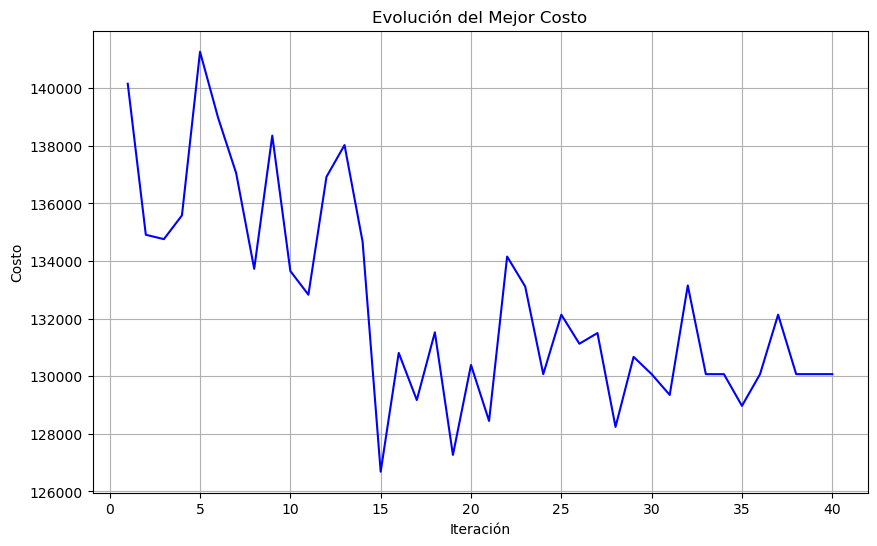


Mejor ruta encontrada: ['Culiacán', 'Victoria de Durango', 'Tepic', 'Guadalajara', 'Colima', 'Morelia', 'Santiago de Querétaro', 'Guanajuato', 'San Luis Potosí', 'Aguascalientes', 'Zacatecas', 'Chilpancingo', 'Pachuca', 'Tlaxcala', 'Puebla', 'Cuernavaca', 'Toluca', 'Ciudad de México', 'Oaxaca', 'Villahermosa', 'Tuxtla Gutiérrez', 'Chetumal', 'Mérida', 'Campeche', 'Xalapa', 'Ciudad Victoria', 'Monterrey', 'Saltillo', 'Chihuahua', 'Hermosillo', 'Mexicali', 'La Paz']
Costo total: 126683.14894524979


In [33]:
random.seed(42)

def optimizacion_colonia_hormigas(matriz_costos, num_hormigas=30, num_iteraciones=150, 
                                alpha=2, beta=4, rho=0.15, q=150, max_estancamiento=25):
    num_nodos = len(matriz_costos)
    
    # Inicializar feromonas con valor más alto para mejor exploración inicial
    feromonas = np.ones((num_nodos, num_nodos)) * 0.2
    
    # Calcular matriz heurística mejorada
    matriz_costos_np = matriz_costos.values
    heuristica = 1 / (matriz_costos_np + 1e-10)
    # Normalizar heurística para mejor balance
    heuristica = heuristica / np.max(heuristica)
    
    mejor_ruta_global = None
    mejor_costo_global = float('inf')
    estancamiento = 0
    
    # Lista para almacenar el historial de mejores costos
    historial_costos = []
    
    nombres_estados = {i: estado for i, estado in enumerate(matriz_costos.index)}
    
    for iteracion in range(num_iteraciones):
        rutas_hormigas = []
        costos_hormigas = []
        
        # Construcción de rutas por cada hormiga con elitismo
        for hormiga in range(num_hormigas):
            ruta_valida = False
            intentos = 0
            max_intentos = 150  # Aumentado para más intentos de encontrar rutas válidas
            
            while not ruta_valida and intentos < max_intentos:
                # Selección de ciudad inicial con preferencia por ciudades menos visitadas
                ciudades_no_visitadas = list(range(num_nodos))
                if hormiga == 0 and mejor_ruta_global is not None:  # Elitismo
                    ruta_actual = [mejor_ruta_global[0]]
                else:
                    ruta_actual = [random.choice(ciudades_no_visitadas)]
                ciudades_disponibles = set(ciudades_no_visitadas) - set(ruta_actual)
                
                while ciudades_disponibles:
                    ciudad_actual = ruta_actual[-1]
                    
                    # Cálculo mejorado de probabilidades
                    probabilidades = []
                    for ciudad in ciudades_disponibles:
                        ruta_temporal = ruta_actual + [ciudad]
                        if es_ruta_valida(ruta_temporal, nombres_estados):
                            tau = feromonas[ciudad_actual][ciudad]
                            eta = heuristica[ciudad_actual, ciudad]
                            # Factor de diversificación
                            diversificacion = 1.0 / (1.0 + len([r for r in rutas_hormigas if ciudad in r]))
                            probabilidades.append((ciudad, (tau ** alpha) * (eta ** beta) * diversificacion))
                    
                    if not probabilidades:
                        break
                    
                    total = sum(p[1] for p in probabilidades)
                    probabilidades = [(ciudad, p/total) for ciudad, p in probabilidades]
                    
                    # Selección mejorada con ruleta
                    r = random.random()
                    acum = 0
                    for ciudad, prob in probabilidades:
                        acum += prob
                        if r <= acum:
                            siguiente_ciudad = ciudad
                            break
                    
                    ruta_actual.append(siguiente_ciudad)
                    ciudades_disponibles.remove(siguiente_ciudad)
                
                if len(ruta_actual) == num_nodos and es_ruta_valida(ruta_actual, nombres_estados):
                    ruta_valida = True
                    
                intentos += 1
            
            if ruta_valida:
                costo_ruta = sum(matriz_costos.iloc[ruta_actual[i], ruta_actual[i+1]] 
                               for i in range(len(ruta_actual)-1))
                costo_ruta += matriz_costos.iloc[ruta_actual[-1], ruta_actual[0]]
                
                rutas_hormigas.append(ruta_actual)
                costos_hormigas.append(costo_ruta)
        
        if not rutas_hormigas:
            continue
            
        # Actualización de mejor solución con elitismo
        mejor_costo_iter = min(costos_hormigas)
        historial_costos.append(mejor_costo_iter)
        
        if mejor_costo_iter < mejor_costo_global:
            mejor_costo_global = mejor_costo_iter
            mejor_ruta_global = rutas_hormigas[costos_hormigas.index(mejor_costo_iter)].copy()
            estancamiento = 0
        else:
            estancamiento += 1
        
        # Evaporación y depósito de feromonas mejorado
        feromonas *= (1 - rho)
        
        # Depósito de feromonas con bonus para mejores rutas
        for ruta, costo in zip(rutas_hormigas, costos_hormigas):
            deposito = q / costo
            if costo == mejor_costo_iter:  # Bonus para la mejor ruta
                deposito *= 1.5
            for i in range(len(ruta)-1):
                feromonas[ruta[i]][ruta[i+1]] += deposito
                feromonas[ruta[i+1]][ruta[i]] += deposito
            feromonas[ruta[-1]][ruta[0]] += deposito
            feromonas[ruta[0]][ruta[-1]] += deposito
        
        print(f"Iteración {iteracion + 1}: Mejor costo = {mejor_costo_global:.2f}")
        
        if estancamiento >= max_estancamiento:
            print(f"Optimización detenida en iteración {iteracion + 1} por estancamiento")
            break
    
    # Graficar evolución del mejor costo
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(historial_costos) + 1), historial_costos, 'b-')
    plt.title('Evolución del Mejor Costo')
    plt.xlabel('Iteración')
    plt.ylabel('Costo')
    plt.grid(True)
    plt.show()
    
    return mejor_ruta_global, mejor_costo_global

# Ejecutar el algoritmo
mejor_ruta, mejor_costo = optimizacion_colonia_hormigas(matriz_costos)

# Convertir índices a nombres de estados
mejor_ruta_hormigas = [matriz_costos.index[i] for i in mejor_ruta]
print("\nMejor ruta encontrada:", mejor_ruta_hormigas)
print("Costo total:", mejor_costo)

Iteración 1: Mejor costo = 139462.90
Iteración 2: Mejor costo = 139070.45
Iteración 3: Mejor costo = 139070.45
Iteración 4: Mejor costo = 137278.35
Iteración 5: Mejor costo = 133539.81
Iteración 6: Mejor costo = 133539.81
Iteración 7: Mejor costo = 133539.81
Iteración 8: Mejor costo = 133539.81
Iteración 9: Mejor costo = 133539.81
Iteración 10: Mejor costo = 133539.81
Iteración 11: Mejor costo = 133539.81
Iteración 12: Mejor costo = 133330.83
Iteración 13: Mejor costo = 130602.23
Iteración 14: Mejor costo = 130602.23
Iteración 15: Mejor costo = 130602.23
Iteración 16: Mejor costo = 130602.23
Iteración 17: Mejor costo = 128165.13
Iteración 18: Mejor costo = 128165.13
Iteración 19: Mejor costo = 128165.13
Iteración 20: Mejor costo = 128165.13
Iteración 21: Mejor costo = 126018.83
Iteración 22: Mejor costo = 125865.30
Iteración 23: Mejor costo = 125865.30
Iteración 24: Mejor costo = 123643.19
Iteración 25: Mejor costo = 123643.19
Iteración 26: Mejor costo = 123643.19
Iteración 27: Mejor c

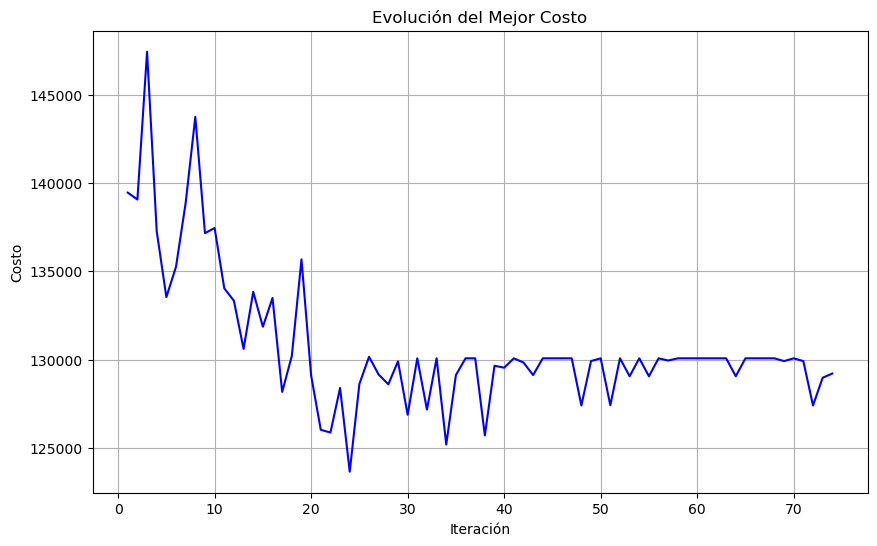


Mejor ruta encontrada con parámetros optimizados: ['Culiacán', 'Victoria de Durango', 'Tepic', 'Guadalajara', 'Zacatecas', 'Aguascalientes', 'San Luis Potosí', 'Guanajuato', 'Santiago de Querétaro', 'Morelia', 'Colima', 'Chilpancingo', 'Tlaxcala', 'Puebla', 'Cuernavaca', 'Toluca', 'Ciudad de México', 'Pachuca', 'Xalapa', 'Oaxaca', 'Tuxtla Gutiérrez', 'Villahermosa', 'Campeche', 'Mérida', 'Chetumal', 'Ciudad Victoria', 'Monterrey', 'Saltillo', 'Chihuahua', 'Hermosillo', 'Mexicali', 'La Paz']
Costo total optimizado: 123643.19010616801


In [34]:
# Parámetros mejorados para la optimización de colonia de hormigas
n_hormigas = 50  # Aumentado de 20 a 50 hormigas para mejor exploración
n_iteraciones = 200  # Aumentado para dar más tiempo de convergencia
alpha = 2.0  # Aumentado para dar más importancia a las feromonas
beta = 3.0  # Aumentado para balancear mejor con la heurística de distancia
rho = 0.1  # Reducido para una evaporación más lenta y mejor memoria
q = 100  # Aumentado para depósitos de feromona más significativos
max_estancamiento = 50  # Aumentado para permitir más iteraciones sin mejora

# Ejecutar el algoritmo con los parámetros mejorados
mejor_ruta, mejor_costo = optimizacion_colonia_hormigas(
    matriz_costos,
    num_hormigas=n_hormigas,
    num_iteraciones=n_iteraciones,
    alpha=alpha,
    beta=beta,
    rho=rho,
    q=q,
    max_estancamiento=max_estancamiento
)

# Convertir índices a nombres de estados
mejor_ruta_hormigas = [nombres_estados[i] for i in mejor_ruta]
print("\nMejor ruta encontrada con parámetros optimizados:", mejor_ruta_hormigas)
print("Costo total optimizado:", mejor_costo)

In [35]:
crear_animacion(mejor_ruta_hormigas, coordenadas_estados, "AOC")

C:\Users\User\AppData\Local\Temp\ipykernel_22172\2070981058.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagenes.append(imageio.imread(f'ruta_{i}.png'))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ec9a099-ae47-4465-83e6-5fb12c03f524' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>